a) write the syntax to print the five points summary of a dataframe using pandas.
You can use the second question’s dataset.

b)

1. Handle the missing values in the dataset using appropriate imputation techniques.
2. Normalize the numeric columns (CGPA, Internships) using a suitable scaling method.
3. Handle the categorical data using proper encoding for all categorical features.
4. Find the student(s) with the highest CGPA from the CSE department.

In [15]:
import pandas as pd
import numpy as np

# Create a sample DataFrame based on the description in the problem statement
data = {
    'Student_ID': range(201, 206),
    'CGPA': [3.6, 3.1, 3.8, 2.9, np.nan],
    'Major': ['IT', 'Mechanical', 'CSE', 'Civil', 'CSE'],
    'Internships': [1, 0, 2, 1, 3],
    'Placed': ['Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

print("Sample DataFrame created:")
df.head()

Sample DataFrame created:


,Student_ID,CGPA,Major,Internships,Placed
0,201,3.6,IT,1,Yes
1,202,3.1,Mechanical,0,No
2,203,3.8,CSE,2,Yes
3,204,2.9,Civil,1,No
4,205,NaN,CSE,3,Yes


5 point summery

In [16]:
print("\nFive-point summary of the DataFrame:")
df.describe()


Five-point summary of the DataFrame:


,Student_ID,CGPA,Internships
count,5.000000,4.000000,5.000000
mean,203.000000,3.350000,1.400000
std,1.581139,0.420317,1.140175
min,201.000000,2.900000,0.000000
25%,202.000000,3.050000,1.000000
50%,203.000000,3.350000,1.000000
75%,204.000000,3.650000,2.000000
max,205.000000,3.800000,3.000000


Handle missing values

In [17]:
df.isnull().sum()

Student_ID     0
CGPA           1
Major          0
Internships    0
Placed         0
dtype: int64

In [ ]:
df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)  # imputation techniques.
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5576\3912097662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)


,Student_ID,CGPA,Major,Internships,Placed
0,201,0.767869,IT,-0.392232,Yes
1,202,-0.767869,Mechanical,-1.372813,No
2,203,1.382164,CSE,0.588348,Yes
3,204,-1.382164,Civil,-0.392232,No
4,205,0.000000,CSE,1.568929,Yes


In [ ]:
# df = df.fillna('#')
#df.head()

,Student_ID,CGPA,Major,Internships,Placed
0,201,0.767869,IT,-0.392232,Yes
1,202,-0.767869,Mechanical,-1.372813,No
2,203,1.382164,CSE,0.588348,Yes
3,204,-1.382164,Civil,-0.392232,No
4,205,0.000000,CSE,1.568929,Yes


Normalize 2 column CGPA , Internship

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['CGPA', 'Internships']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("\nDataFrame after standardizing numerical features:")
df.head()


DataFrame after standardizing numerical features:


,Student_ID,CGPA,Major,Internships,Placed
0,201,7.678689e-01,IT,-0.392232,Yes
1,202,-7.678689e-01,Mechanical,-1.372813,No
2,203,1.382164e+00,CSE,0.588348,Yes
3,204,-1.382164e+00,Civil,-0.392232,No
4,205,2.664535e-16,CSE,1.568929,Yes


In [26]:
df = pd.get_dummies(df, columns=['Major', 'Placed'], drop_first=False)

print("DataFrame after one-hot encoding 'Major' and 'Placed' columns:")
df.head()

DataFrame after one-hot encoding 'Major' and 'Placed' columns:


,Student_ID,CGPA,Internships,Major_CSE,Major_Civil,Major_IT,Major_Mechanical,Placed_No,Placed_Yes
0,201,7.678689e-01,-0.392232,False,False,True,False,False,True
1,202,-7.678689e-01,-1.372813,False,False,False,True,True,False
2,203,1.382164e+00,0.588348,True,False,False,False,False,True
3,204,-1.382164e+00,-0.392232,False,True,False,False,True,False
4,205,2.664535e-16,1.568929,True,False,False,False,False,True


In [30]:
cse_students = df[df['Major_CSE'] == True]
highest_cgpa_cse = cse_students['CGPA'].max()
top_cse_students = cse_students[cse_students['CGPA'] == highest_cgpa_cse]

print("Student(s) from CSE department with the highest CGPA:")
display(top_cse_students)


Student(s) from CSE department with the highest CGPA:


,Student_ID,CGPA,Internships,Major_CSE,Major_Civil,Major_IT,Major_Mechanical,Placed_No,Placed_Yes
2,203,1.382164,0.588348,True,False,False,False,False,True


Lab report 1

You’re asked to turn the CSV income.csv into five clear, publication-ready visualizations
using Seaborn, then deliver a single PDF containing all figures plus a short written “final
decision” — what overall story the visuals tell. Be tidy, reproducible, and a little nerdy about
clarity and style.
Required plots (one per task):
1. Heatmap
2. Boxplot
3. Violin Plot
4. Barplot
5. Histogram
For each plot include:
(a) the code cell that creates it
(b) the saved figure (.pdf)
(c) a 1–2 sentence interpretation explaining what it shows
Save all five figures and combine them into one file named <yourID>.pdf for submission.
Dataset Link: income.csv

In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Heatmap

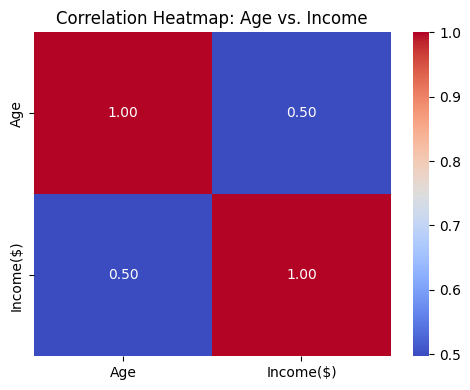

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr(numeric_only=True)
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Age vs. Income", fontsize=12)
plt.tight_layout()
# plt.savefig("heatmap.pdf")
plt.show()

Boxplot

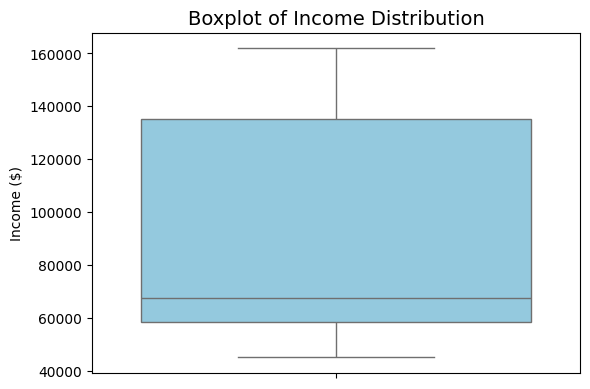

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y="Income($)", data=df, color="skyblue")
plt.title("Boxplot of Income Distribution", fontsize=14)
plt.ylabel("Income ($)")
plt.tight_layout()
# plt.savefig("boxplot.pdf")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5576\1909481010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Age",y="Income($)",data=df, inner="quartile", palette="muted")


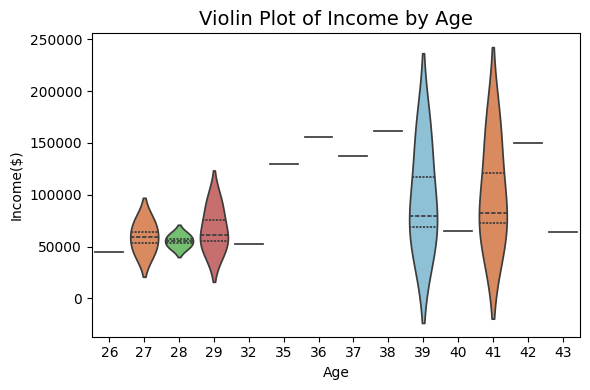

In [42]:
plt.figure(figsize=(6, 4))
sns.violinplot(x="Age",y="Income($)",data=df, inner="quartile", palette="muted")
plt.title("Violin Plot of Income by Age", fontsize=14)
plt.tight_layout()
# plt.savefig("violin_plot.pdf")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5576\831708494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age", y="Income($)", data=df, estimator="mean", palette="viridis")


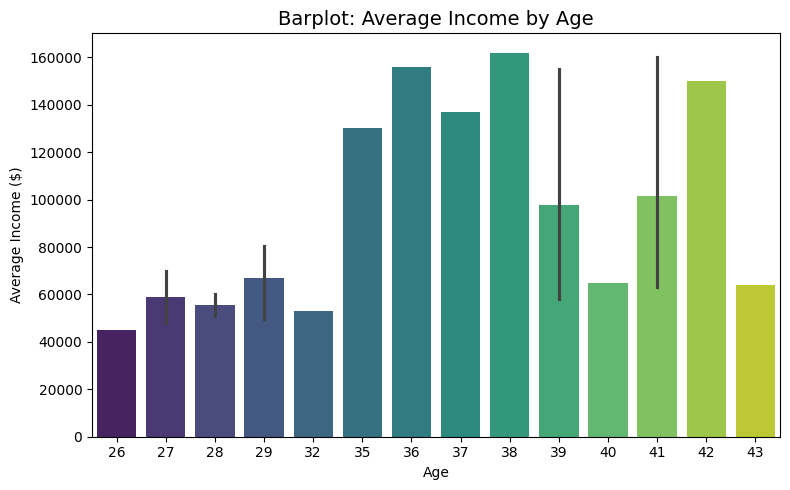

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Age", y="Income($)", data=df, estimator="mean", palette="viridis")
plt.title("Barplot: Average Income by Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Average Income ($)")
plt.tight_layout()
# plt.savefig("barplot.pdf")
plt.show()

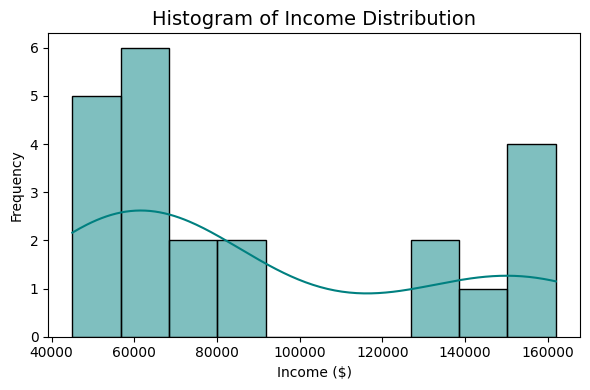

In [44]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Income($)"],bins=10, kde=True, color="teal")
plt.title("Histogram of Income Distribution", fontsize=14)
plt.xlabel("Income ($)")
plt.ylabel("Frequency")
plt.tight_layout()
# plt.savefig("histogram.pdf")
plt.show()